#### Importing libraries and packages

In [260]:
#for data analysis
import pandas as pd
import numpy as np

#for visualization
import matplotlib.pyplot as plt
import seaborn as sns 

#### Read and display csv file

In [261]:
#df=dataframe
df = pd.read_csv("toyota.csv")

#datatype
print(type(df))

#displaying data
display (df.head(5))
display (df.tail(5))

<class 'pandas.core.frame.DataFrame'>


,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,36.2,2.0


,model,year,price,transmission,mileage,fuelType,mpg,engineSize
6733,IQ,2011,5500,Automatic,30000,Petrol,58.9,1.0
6734,Urban Cruiser,2011,4985,Manual,36154,Petrol,50.4,1.3
6735,Urban Cruiser,2012,4995,Manual,46000,Diesel,57.6,1.4
6736,Urban Cruiser,2011,3995,Manual,60700,Petrol,50.4,1.3
6737,Urban Cruiser,2011,4495,Manual,45128,Petrol,50.4,1.3


#### Checking missing values and file info

In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   mpg           6738 non-null   float64
 7   engineSize    6738 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 421.2+ KB


In [263]:
#number of rows(tuple first value) and columns(tuple second value) 
print(df.shape) #this determines tuple ()

print ("number of rows = ", df.shape[0])
print ("number of columns = ", df.shape[1])

(6738, 8)
number of rows =  6738
number of columns =  8


#### No. of cars yearly in ascending order

In [264]:
#display all the values of 'year' column
#print(df["year"].values)

#display unique values and lengths of 'year' column
print(df["year"].unique())
print(len(df["year"].unique()))

#display ascending ordered information of 'year' column
print(df["year"].value_counts())

[2016 2017 2015 2020 2013 2019 2018 2014 2012 2005 2003 2004 2001 2008
 2007 2010 2011 2006 2009 2002 1999 2000 1998]
23
2017    2019
2019    1286
2018    1015
2016     997
2015     525
2014     352
2013     204
2020     128
2012      42
2011      40
2009      29
2007      20
2008      19
2010      18
2005      12
2006      11
2004       7
2003       6
2002       4
2001       1
1999       1
2000       1
1998       1
Name: year, dtype: int64


#### Model count in ascending order

In [265]:
print(df["model"].value_counts())

 Yaris            2122
 Aygo             1961
 Auris             712
 C-HR              479
 RAV4              473
 Corolla           267
 Prius             232
 Avensis           115
 Verso             114
 Hilux              86
 GT86               73
 Land Cruiser       51
 PROACE VERSO       15
 Supra              12
 Camry              11
 IQ                  8
 Urban Cruiser       4
 Verso-S             3
Name: model, dtype: int64


## Counting the 'fueltype' column

In [266]:
print(df["fuelType"].value_counts())
print(type(df["fuelType"].value_counts()))

#converting to Dataframe (more usable)
df_fuelType = pd.DataFrame(df["fuelType"].value_counts())
display(df_fuelType.head())

#to check index and columns of the dataframe
print(df_fuelType.index)
print(df_fuelType.columns)

Petrol    4087
Hybrid    2043
Diesel     503
Other      105
Name: fuelType, dtype: int64
<class 'pandas.core.series.Series'>


,fuelType
Petrol,4087
Hybrid,2043
Diesel,503
Other,105


Index(['Petrol', 'Hybrid', 'Diesel', 'Other'], dtype='object')
Index(['fuelType'], dtype='object')


#### Pie chart for 'fuelType' column

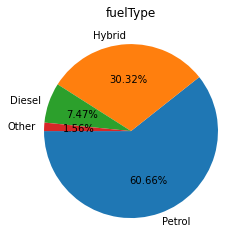

In [267]:
df["fuelType"].value_counts().plot(kind="pie", 
                                       autopct='%1.2f%%', 
                                       title="Types of fuel", 
                                       startangle=180, 
                                       fontsize=10)
#remove y axis label
plt.ylabel("")

#remove extra information
plt.show()

#### Resetting the columns

In [268]:
#first reset the index
df_fuelType = df_fuelType.reset_index()

#second rename the columns
df_fuelType = df_fuelType.rename(columns = {"index":"fuelType",
                                           "fuelType":"no_of_cars"})

#create new column (% of cars)
df_fuelType["% of cars"] = df_fuelType["no_of_cars"]/df.shape[0]*100

#limit the decimals
df_fuelType = df_fuelType.round(2)
display(df_fuelType)

,fuelType,no_of_cars,% of cars
0,Petrol,4087,60.66
1,Hybrid,2043,30.32
2,Diesel,503,7.47
3,Other,105,1.56


#### Barplot for 'fuelType' column 

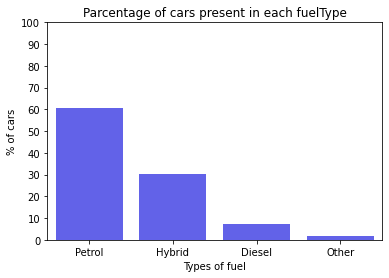

In [269]:
sns.barplot(x="fuelType", 
            y="% of cars", 
            data=df_fuelType, 
            color = "blue",
           alpha=0.7) #alpha=transparency


plt.xlabel("Types of fuel")
plt.ylabel("% of cars")
plt.title("Parcentage of cars present in each fuelType")

#resizing y axis values
plt.yticks(np.arange(0,101,10)) #(start value, max value, interval/increment)
plt.show()

## Counting the 'transmission' column

In [270]:
print(df["transmission"].value_counts())

Manual       3826
Automatic    2657
Semi-Auto     254
Other           1
Name: transmission, dtype: int64


#### Pie plot for 'transmission' column

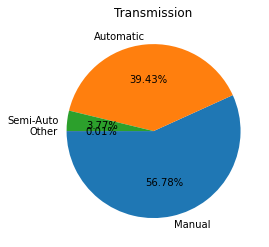

In [271]:
df["transmission"].value_counts().plot(kind="pie", 
                                       autopct='%1.2f%%', 
                                       title="Transmission", 
                                       startangle=180, 
                                       fontsize=10)

plt.ylabel("")
plt.show()

#### Barplot for 'transmission' column

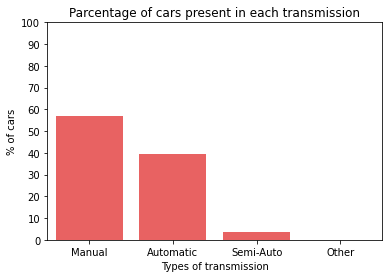

In [272]:
sns.barplot(x="transmission", 
            y="% of cars", 
            data=df_transmission, 
            color = "red",
           alpha=0.7)

plt.xlabel("Types of transmission")
plt.ylabel("% of cars")
plt.title("Parcentage of cars present in each transmission")

plt.yticks(np.arange(0,101,10))
plt.show()